In [2]:
from nyu_depth import NYUDepth
from matplotlib import pyplot as plt
import numpy as np
from skimage import io
from fcrn import FCRN
import torch
import os

resume = True
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
exp_name = 'normal_internel'
model_dir = os.path.join('checkpoints', exp_name)
# load model
model = FCRN(True)
model = model.to(device)
model.eval()

if resume:
    model_path = os.path.join(model_dir, 'model.pth')
    if os.path.exists(model_path):
        print('Loading checkpoint from {}...'.format(model_path))
        # load model and optimizer
        checkpoint = torch.load(os.path.join(model_dir, 'model.pth'), map_location='cpu')
        model.load_state_dict(checkpoint['model'])
        print('Model loaded.')
    else:
        print('No checkpoint found. Train from scratch')


Loading checkpoint from checkpoints/normal_internel/model.pth...
Model loaded.


In [5]:
import skimage
results = []
indices = [0, 1, 2, 3, 4]
# indices = [5, 6, 7, 8, 9]

imgs = []
depths = []
demo_path = 'data/demo'
for i in indices:
    img_path = os.path.join(demo_path, '{:04}.png'.format(i))
    image = io.imread(img_path)
    image = skimage.img_as_float(image)
    image = image.transpose(2, 0, 1)
    imgs.append(torch.from_numpy(image).float())
#     depths.append(depth)
    
img_batch = torch.stack(imgs, dim=0).to(device)
pred_batch, _ = model(img_batch)

preds = [x.cpu().detach() for x in pred_batch]

/Users/lin/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [6]:
imgs = [x.permute(1, 2, 0).numpy() for x in imgs]
# depths = [x.numpy()[0] for x in depths]
preds = [x.numpy()[0] for x in preds]

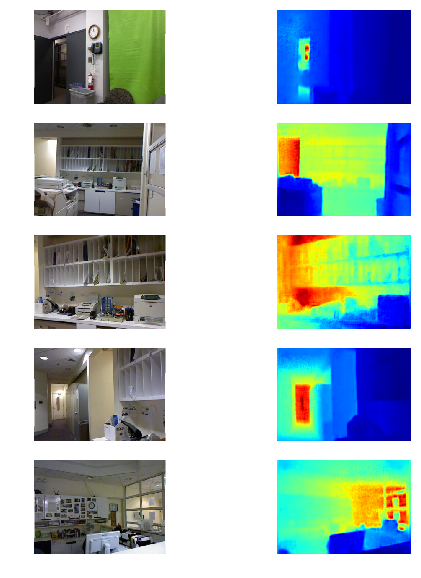

In [8]:
def show(imgs, preds):
    rows = len(imgs)
    
    plt.figure(figsize=(8, 10))
    for i in range(rows):
        plt.subplot(rows, 2, i * 2 + 1)
        plt.axis('off')
        plt.imshow(imgs[i])
#         plt.subplot(rows, 3, i * 3 + 2)
#         plt.axis('off')
#         plt.imshow(depths[i], cmap='jet')
        plt.subplot(rows, 2, i * 2 + 2)
        plt.axis('off')
        plt.imshow(preds[i], cmap='jet')
    plt.show()

show(imgs, preds)